In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

In [2]:
# All patients in this dataset are females at least 21 years old of Pima Indian heritage.

# Attributes Information:
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1), 0 means does not have diabetes and 1 means does have diabetes.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
os.getcwd()

'C:\\Users\\user\\Documents\\Statistics_and_ML'

In [5]:
df = pd.read_csv('dataset/diabetes_dataset.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.duplicated().sum()

0

## No duplicates found.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## No missing values detected.

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the the above descriptive analysis it can be seen we have a lot of 0 as entries for the variables **'Glucose'**, **'BloodPressure'**, **'SkinThickness'**, **'Insulin'**, **'BMI'** which is simply not possible hence we replace them with 
their respective median values.

In [11]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col].replace(0, df[col].median(), inplace=True)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Handling Outliers:

In [13]:
def handle_outliers_using_emperical_rule(col):
    upper_cutoff = col.mean() + 3*col.std()
    lower_cutoff = col.mean() - 3*col.std()
    return np.where(col > upper_cutoff, upper_cutoff, np.where(col < lower_cutoff, lower_cutoff, col))

In [14]:
def handle_outliers_using_iqr(col):
    q1 = np.quantile(col, .25)
    q3 = np.quantile(col, .75)
    
    iqr = q3 - q1
    
    upper_limit = q3 + iqr * 1.5
    lower_limit = q1 - iqr * 1.5
    
    print(f'q1: {q1}')
    print(f'q3: {q3}')
    print(f'iqr: {iqr}')
    
    return np.where(col > upper_limit, upper_limit, np.where(col < lower_limit, lower_limit, col))

In [15]:
def draw_histplot_and_boxplot(col, outliers_treated = False):
    
    word = "Before"
    
    if outliers_treated:
        word = "After"
    
    plt.figure(figsize=(14,5))

    plt.subplot(1,2,1)
    sns.histplot(x=col, data=df, element="step", kde=True)
    plt.title(f'{word} treating outliers')

    plt.subplot(1,2,2)
    sns.boxplot(y=col)
    plt.ylabel(col.name)

    plt.title(f'{word} treating outliers')

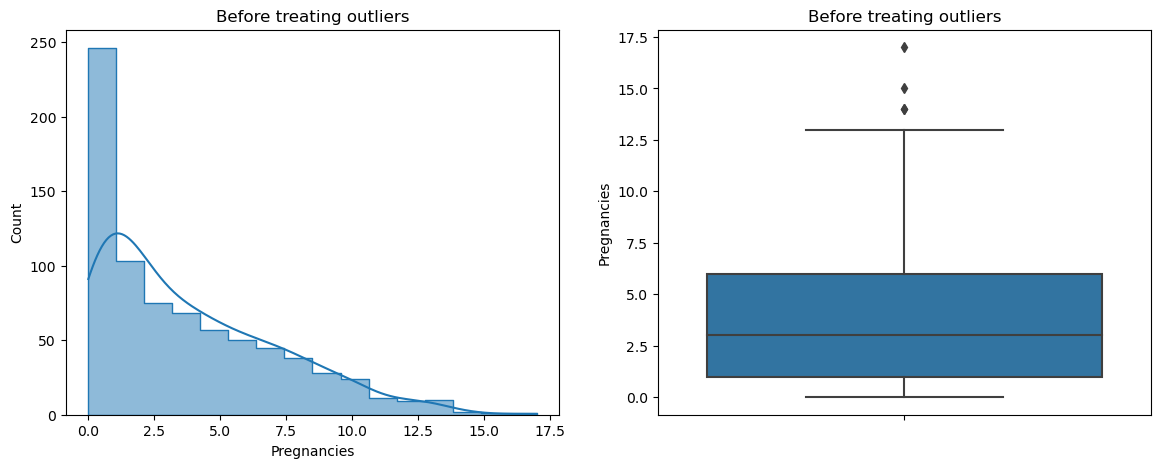

In [16]:
draw_histplot_and_boxplot(df['Pregnancies'])

Not treating the outliers for the variable **'Pregnancies'** because of two reasons:
- The range of the variable **'Pregnancies'** is not large.
- It is possible for a woman to give birth to atmost 36 children in her lifetime if we assume the child bearing age to be 
    from 14 to 50 years.

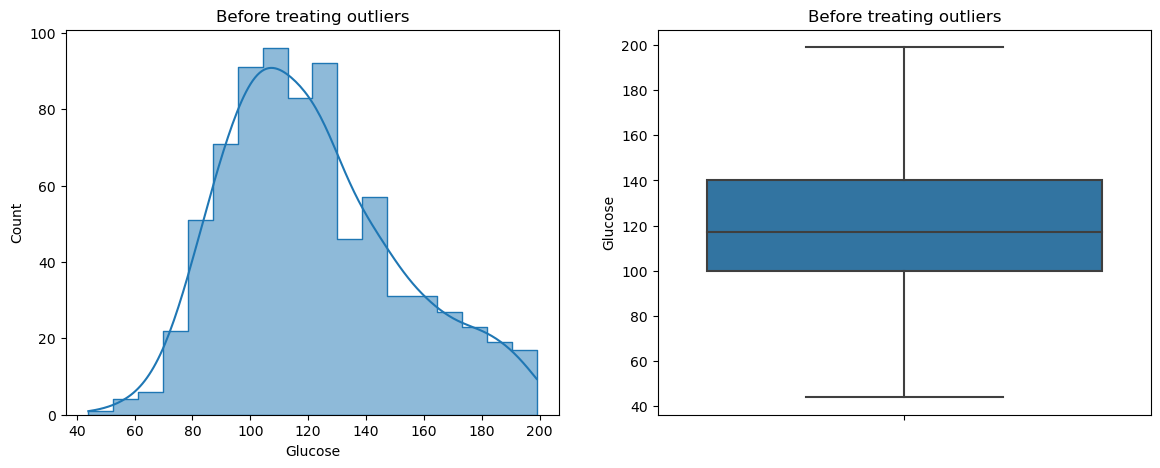

In [17]:
draw_histplot_and_boxplot(df['Glucose'])

There are no ouliers for the variable **'Glucose'**.

The GTT normal value is lower than 140 mg/dL and if the blood glucose level is between 140 and 199 mg/dL then it is a strong indication of prediabetes. 

The OGTT normal range for fasting results is between 100 – 125 mg/dL for prediabetes, 126 mg/dL or greater for diabetes and greater than 92 mg/dL for gestational diabetes.

The OGTT normal range for after 2 hour test results is between 140 – 199 mg/dL for pre diabetes, 200 mg/dL or greater for diabetes and greater than 153 mg/dL for gestational diabetes.

**Note**: The above data for GTT values has been obtained from medical websites.

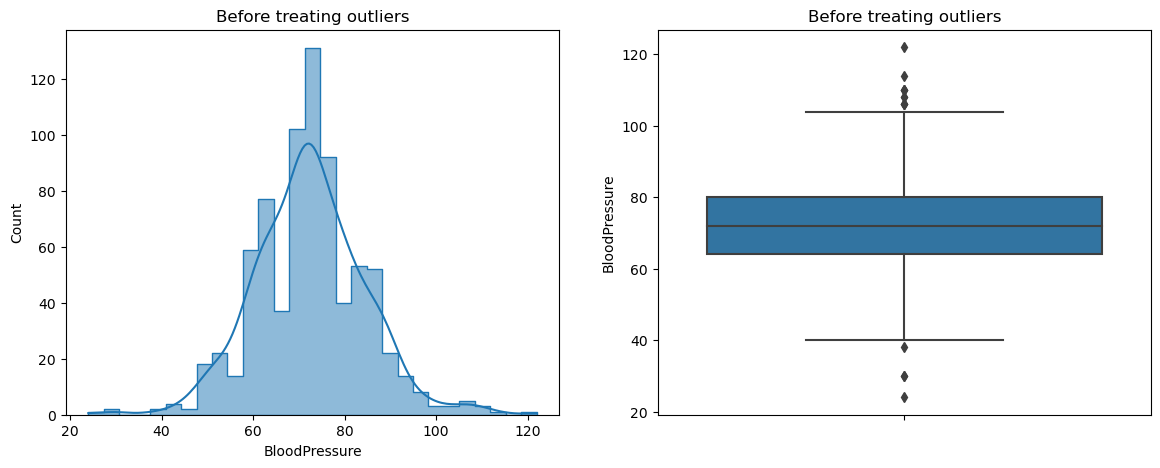

In [18]:
draw_histplot_and_boxplot(df['BloodPressure'])

q1: 64.0
q3: 80.0
iqr: 16.0


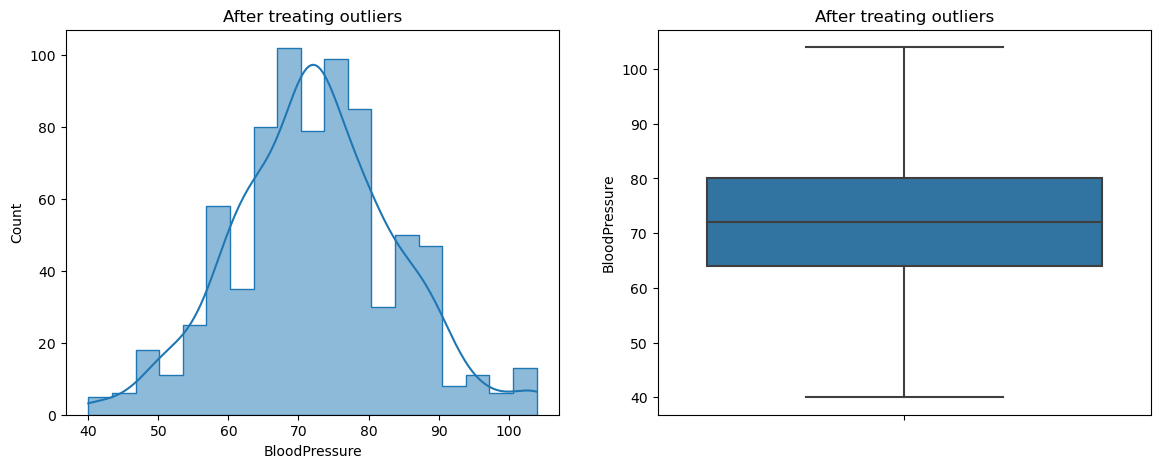

In [19]:
# Since 'BloodPressure' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'BloodPressure'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

Treated the outliers for the variable **'BloodPressure'** because the **threshold of low Dystolic blood pressure is 60 mm Hg**. And the **threshold for Dystolic blood pressure in stage 2 hypertension is 90 mm Hg**. Since we have datapoints which lie much below and much above these thresholds which is very unlikely i.e. why we treat the outliers.

A **normal blood pressure reading** for an adult is blood pressure that’s below **120/80 mm Hg and above 90/60 mm Hg**.

When your **systolic pressure is between 120 and 129 mm Hg** and your **diastolic pressure is less than 80 mm Hg**, it means you have **elevated blood pressure**.

If your **systolic blood pressure is 130 to 139 mm Hg or your diastolic blood pressure is 80 to 89 mm Hg**, it’s considered **stage 1 hypertension**.

If your **systolic blood pressure is 140 mm Hg or higher or your diastolic blood pressure is 90 mm Hg or higher**, it’s considered **stage 2 hypertension**.

A blood pressure reading **above 180/120 mm Hg is considered a hypertensive crisis** and could be dangerous.

**Note:** The above data for the blood pressure readings for different blood pressure categories has been obtained from medical websites.

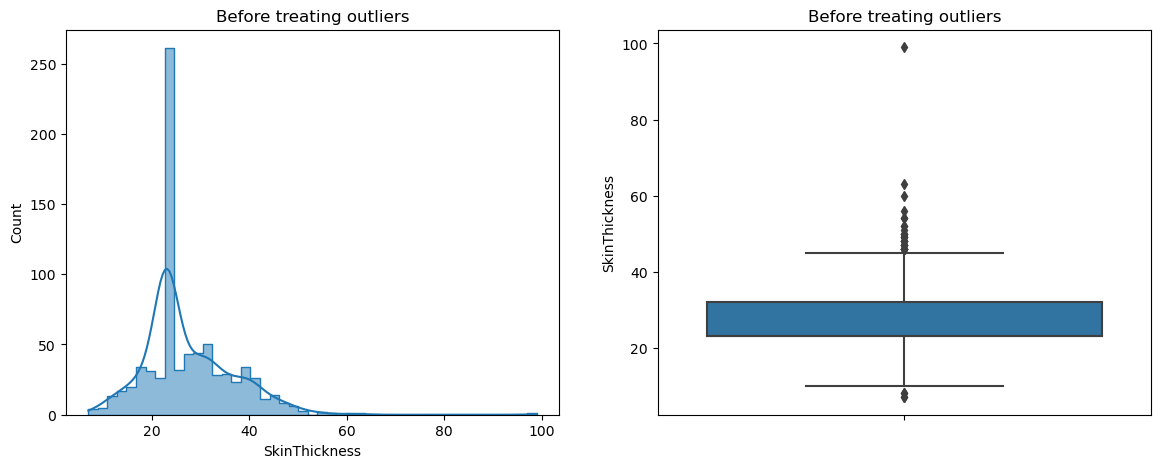

In [20]:
draw_histplot_and_boxplot(df['SkinThickness'])

q1: 23.0
q3: 32.0
iqr: 9.0


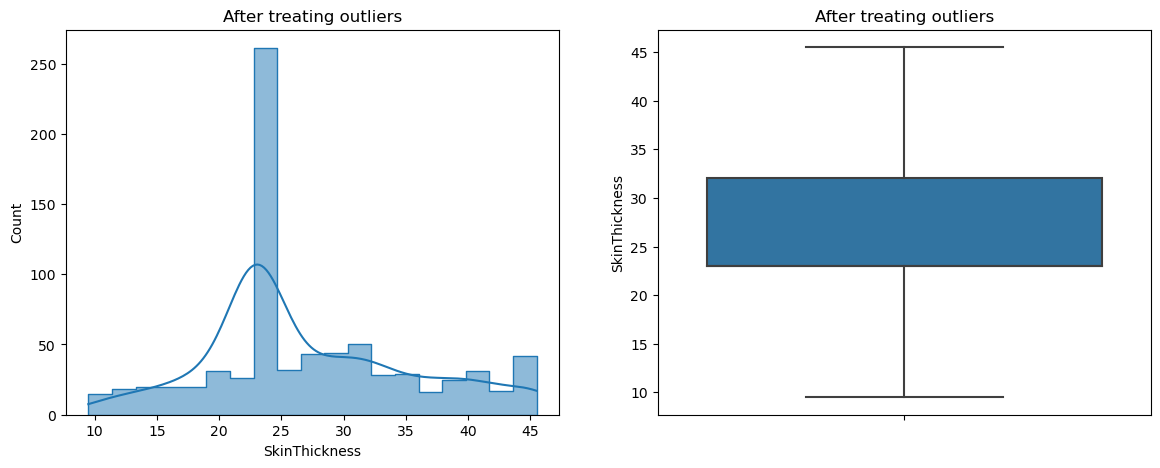

In [21]:
# Since 'SkinThickness' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'SkinThickness'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

Treated the outliers for the variable **'SkinThickness'** because according to **National Health and Nutrition Examination Survey (NHANES) from 1999 to 2010, for female adults the range of Triceps skin fold thickness (mm) is 23.6 ± 7.5 mm**.

Since in our data there are datapoints far above and below this range hence we remove this treat the outliers.

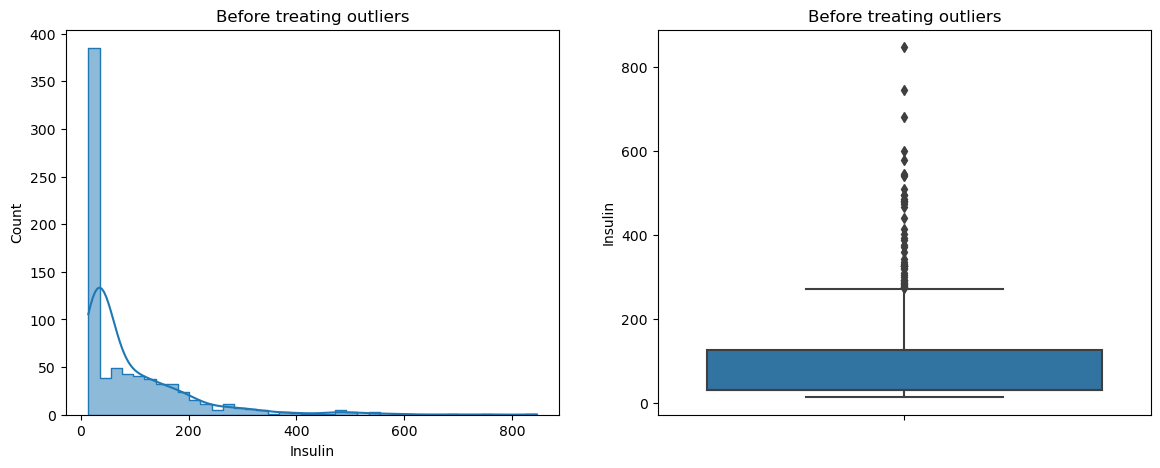

In [22]:
draw_histplot_and_boxplot(df['Insulin'])

q1: 30.5
q3: 127.25
iqr: 96.75


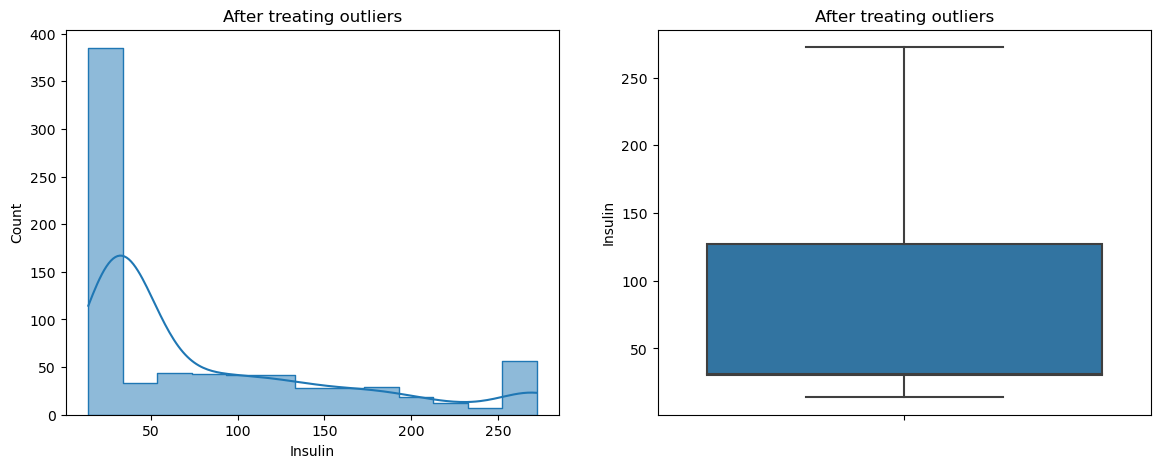

In [23]:
# Since 'Insulin' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'Insulin'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

Treated the outliers for the variable **'Insulin'** because the **normal range of Serum Insulin, 2 hours after glucose 
administration is typically 16-166 mIU/L** but there are datapoints that are much above this range.

**Note:** The above data for normal range of Serum Insulin, 2 hours after glucose administration, has been obtained from 
medical websites.

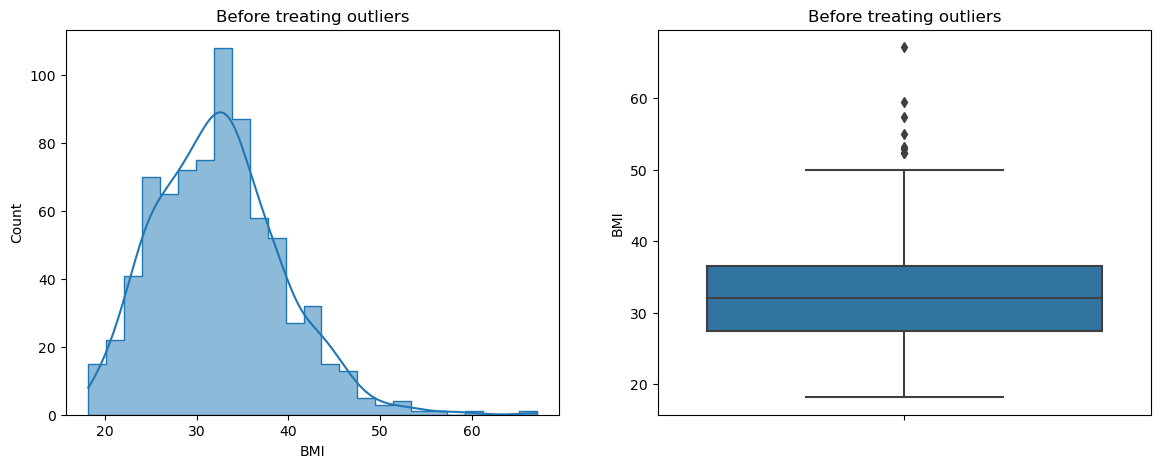

In [24]:
draw_histplot_and_boxplot(df['BMI'])

q1: 27.5
q3: 36.6
iqr: 9.100000000000001


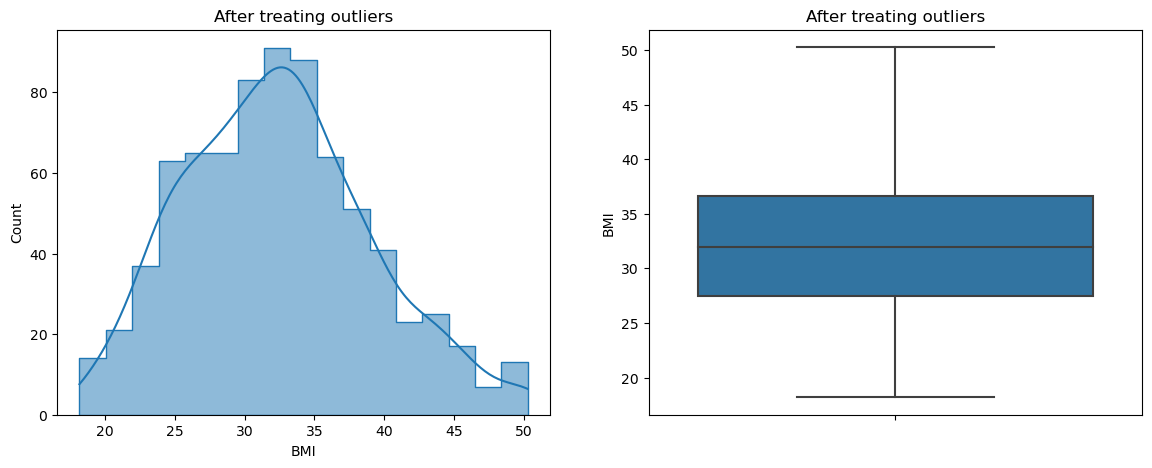

In [25]:
# Since 'BMI' is not normally distributed so we use the IQR based approach to treat outliers.

col_name = 'BMI'

df[col_name] = handle_outliers_using_iqr(df[col_name])
draw_histplot_and_boxplot(df[col_name], outliers_treated=True)

Treated the outliers for the variable **'BMI'** because the **threshold for Class 3 obesity is a BMI of 40 or higher** but there 
are datapoints that are much above this range which is very unlikely.

- Class 1: BMI of 30 to < 35
- Class 2: BMI of 35 to < 40
- Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.

**Note:** The above data for ranges for different categories of obesity has been obtained from medical websites.

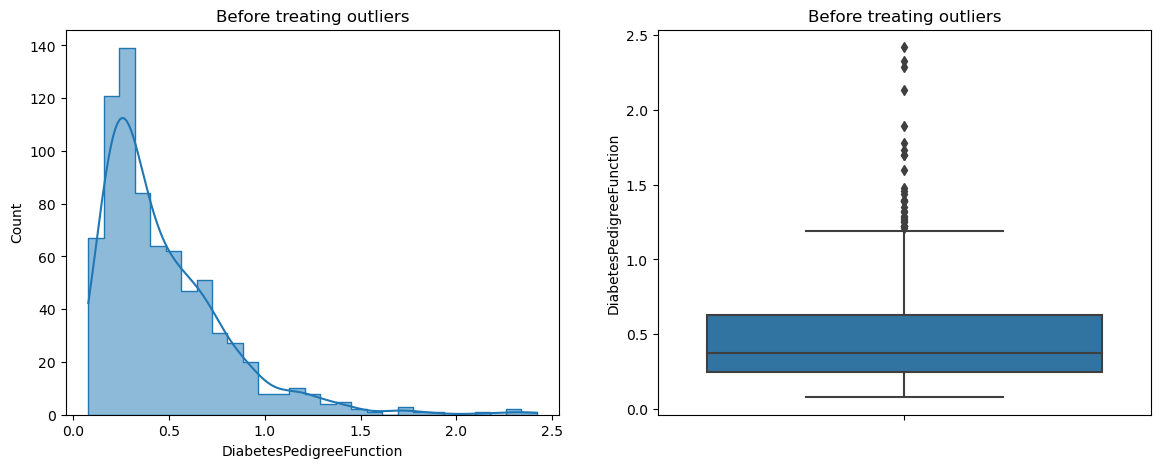

In [26]:
draw_histplot_and_boxplot(df['DiabetesPedigreeFunction'])

Not treating the outliers for the variable **'DiabetesPedigreeFunction'** because the range of 'DiabetesPedigreeFunction' is low.

**DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history.

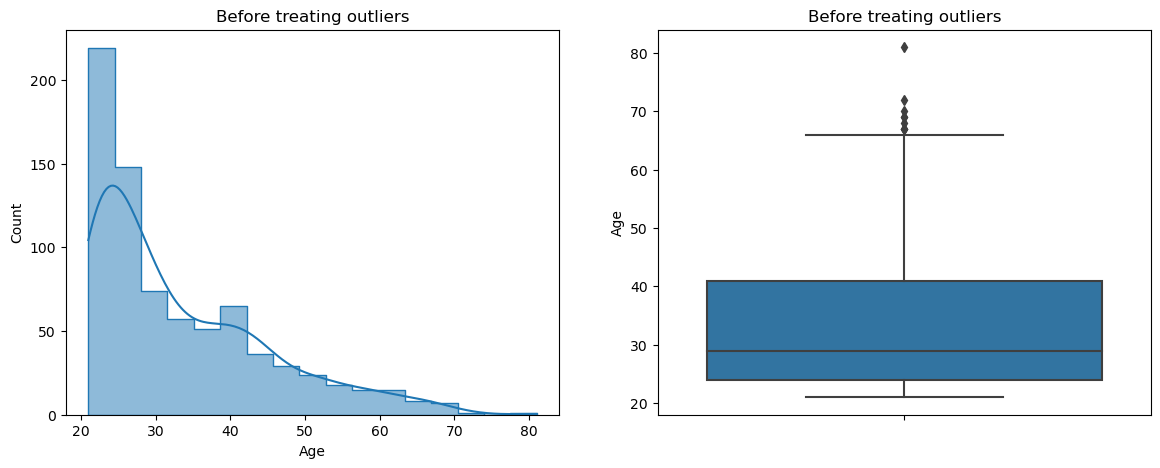

In [27]:
draw_histplot_and_boxplot(df['Age'])

Not treating the outlier for **'Age'** because the range for Age is not too large.

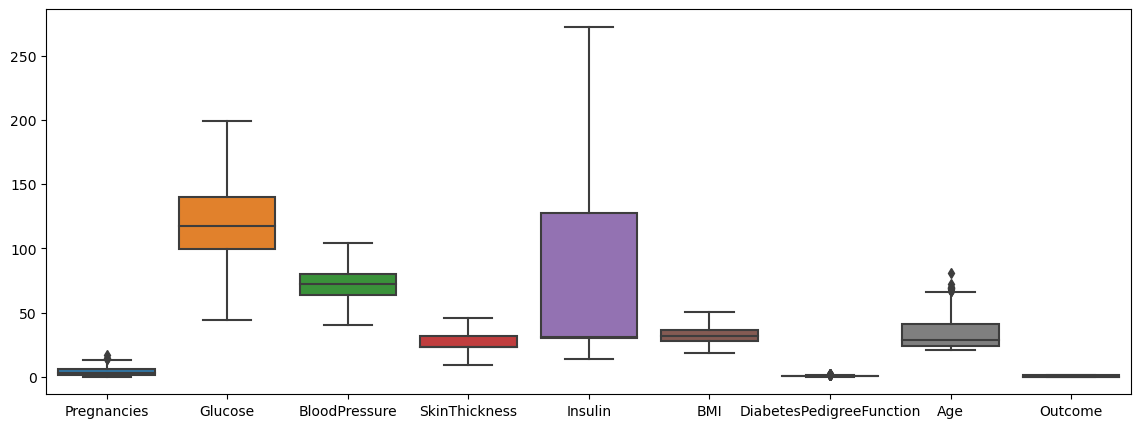

In [28]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df)
plt.show()

## Distribution of the Output variable 'Outcome':
- **Class 0 means Person has Diabeties**
- **Class 1 means Person doesn't have Diabeties**

Text(0.5, 1.0, 'Distribution of Diabetics vs Non-Diabetics')

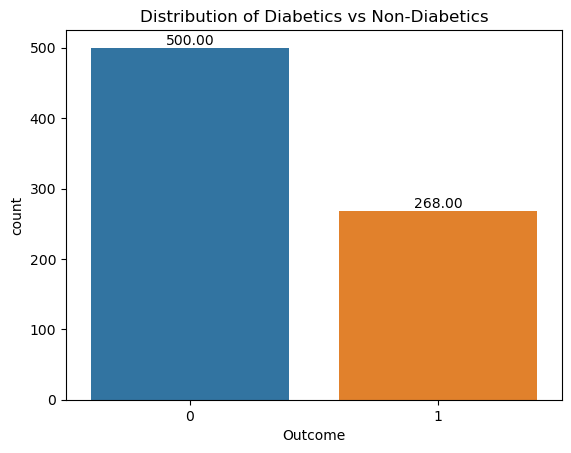

In [29]:
ax = sns.countplot(x='Outcome', data=df)

# Each bar in the figure is represented by the BarContainer object.
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
    
plt.title('Distribution of Diabetics vs Non-Diabetics')

In [30]:
268/768*100

34.89583333333333

In [31]:
500/768*100

65.10416666666666

In [32]:
65.104/34.896

1.8656579550664831

**We have got slight imbalance in our data but using the thumb rule for balanced data we get # (Outcome = 0) / # (Outcome = 1) 
equal to 1.866 which is less than 2 so we say that our datset is balanced.**

## Visualizing the variable 'Pregnancies':

In [33]:
def draw_numerical_plots(col_name):
    plt.figure(figsize=(12, 9))

    plt.subplot(2,2,1)
    ax = sns.barplot(y=col_name, x='Outcome', data=df, ci=None)

    for i in ax.containers:
        ax.bar_label(i, fmt='%.2f')

    plt.subplot(2,2,2)
    sns.boxplot(x="Outcome", y=col_name, data=df)

    plt.subplot(2,2,3)
    sns.histplot(x=col_name,  hue='Outcome', data=df, element="step", kde=True, stat="density")

    plt.tight_layout()
    plt.show()

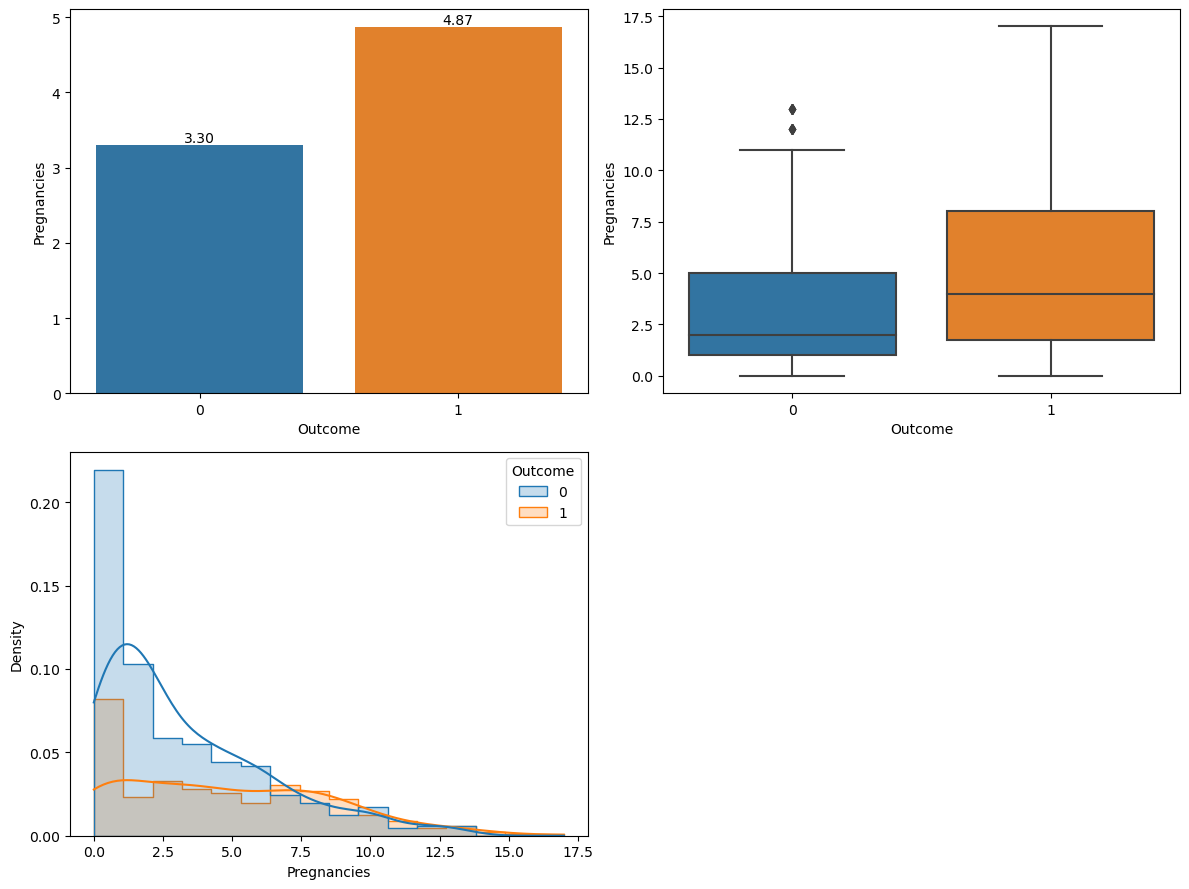

In [34]:
draw_numerical_plots('Pregnancies')

**Observations:**
- Females having diabetes have more number of pregnancies on average.
- However it is not clear that if higher number of pregnancies influence the chances of females having diabetes.

## Visualizing the variable 'Glucose':

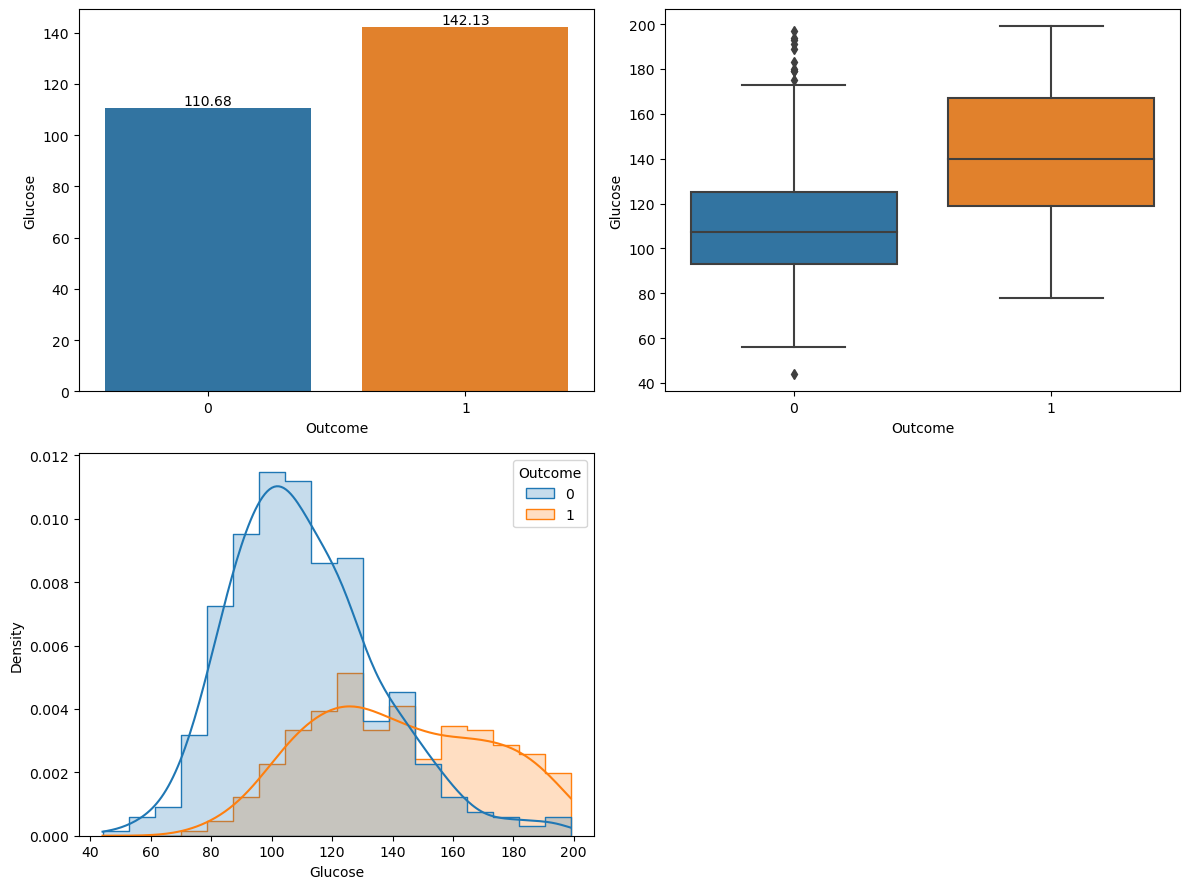

In [35]:
draw_numerical_plots('Glucose')

**Observations:**
- Females having diabetes have higher levels of Glucose on average.
- Variance in Glucose for females having diabetes is higher as compared to ones who do not.

## Visualizing the variable 'BloodPressure':

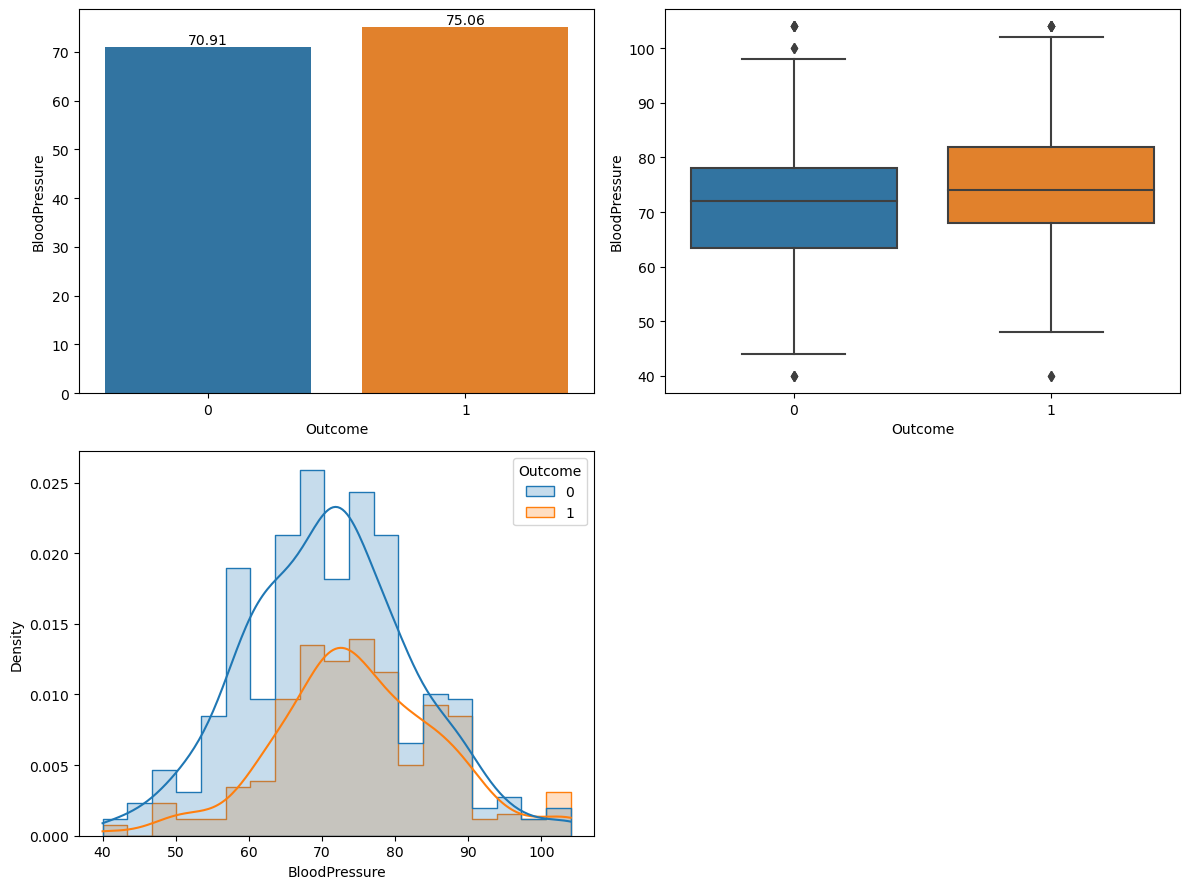

In [36]:
draw_numerical_plots('BloodPressure')

**Observations:**

- Females having diabetes have marginally high BloodPressure on average.

## Visualizing the variable 'SkinThickness':

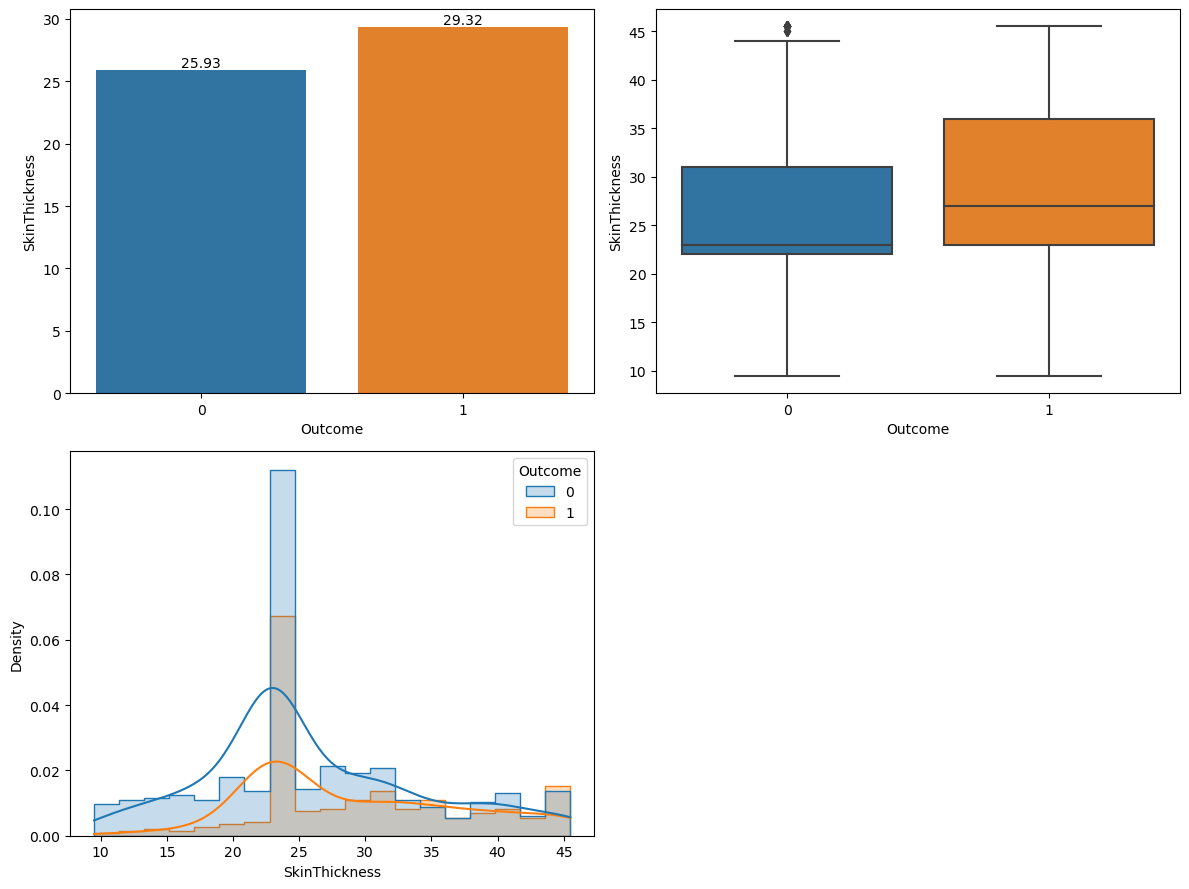

In [37]:
draw_numerical_plots('SkinThickness')

**Observations:**

- Females having diabetes have marginally high SkinThickness on average.
- It appears that women who have diabetes, it is more likely that their SkinThickness is greater than 15mm. 


## Visualizing the variable 'Insulin':

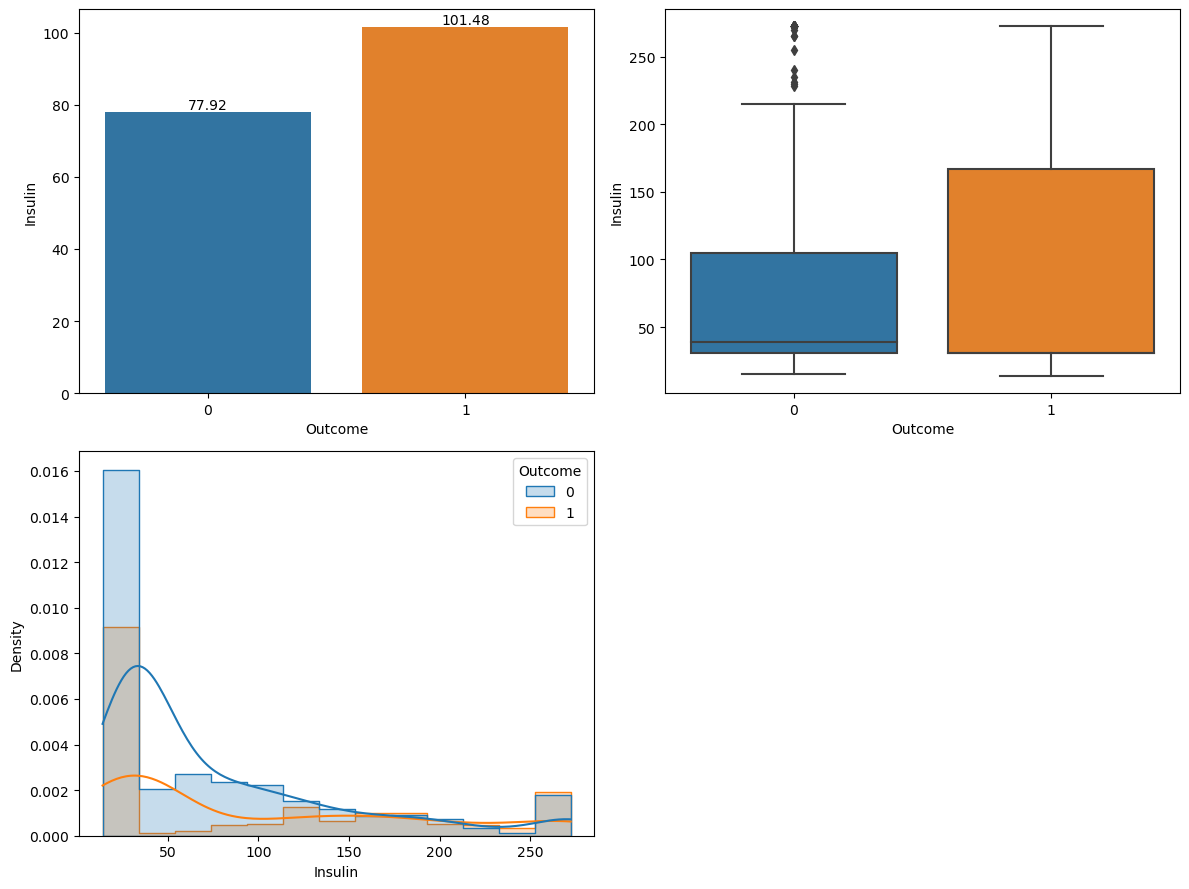

In [38]:
draw_numerical_plots('Insulin')

**Observations:**

- Females having diabetes have high Insulin levels on average.
- It appears that when Insulin levels are less than 150 mIU/L there is a higher chance that the woman does not have diabetes.

## Visualizing the variable 'BMI':

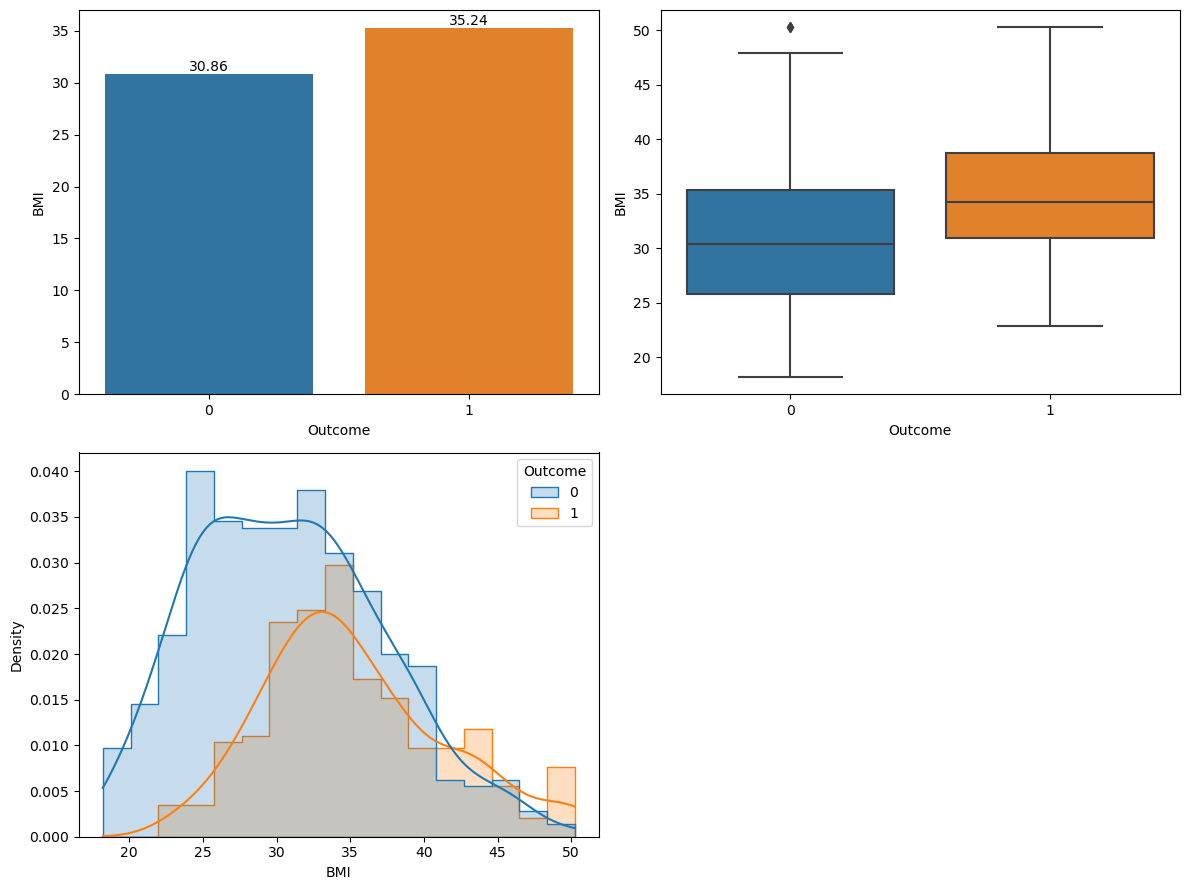

In [39]:
draw_numerical_plots('BMI')

**Observations:**

- Females having diabetes have high BMI on average.

## Visualizing the variable 'DiabetesPedigreeFunction':

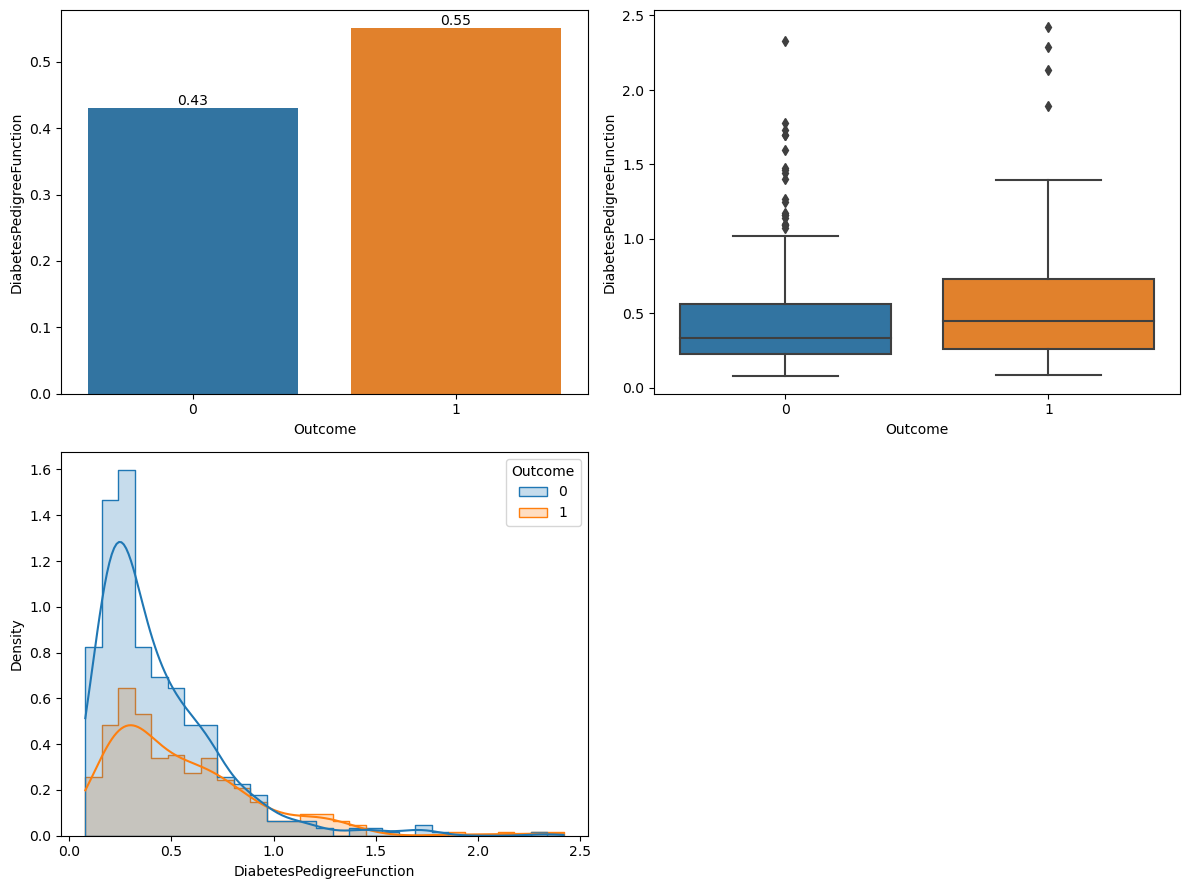

In [40]:
draw_numerical_plots('DiabetesPedigreeFunction')

**Observations:**

- Females having diabetes have high DiabetesPedigreeFunction value on average.
- It seems woman having DiabetesPedigreeFunction value less than 0.8 are more likely to not have diabetes. 

## Visualizing the variable 'Age':

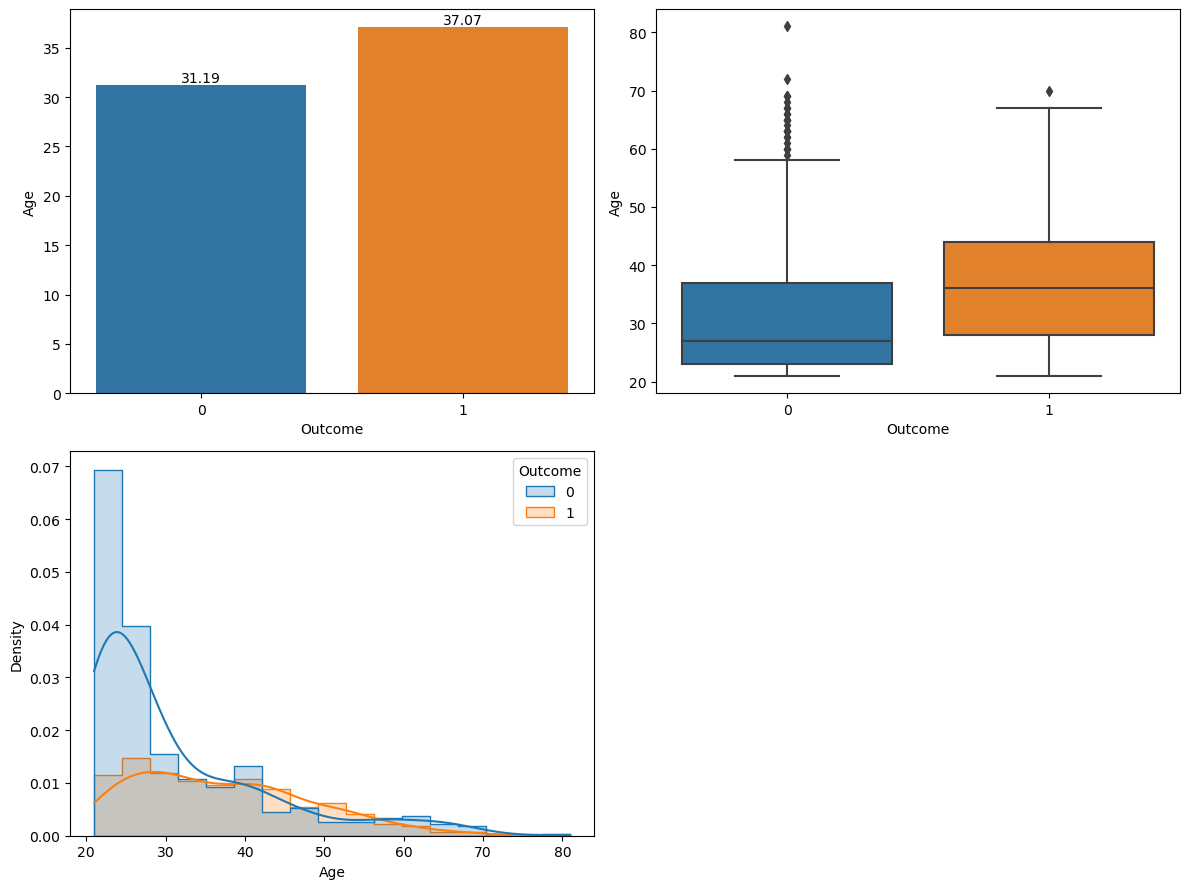

In [41]:
draw_numerical_plots('Age')

**Observations:**

- Females having diabetes are older on average.
- It seems woman having Age less than 40 are more likely to not have diabetes.

## No encoding is required because the only categorical variable 'Outcome' is already encoded.

## Separating the dependent and independent variables:

In [42]:
x = df.drop('Outcome', axis=1)

col_idx_of_dv = df.columns.get_loc('Outcome')
y = df.iloc[:, col_idx_of_dv:col_idx_of_dv+1]

In [43]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35.0,30.5,33.6,0.627,50
1,1,85,66.0,29.0,30.5,26.6,0.351,31
2,8,183,64.0,23.0,30.5,23.3,0.672,32
3,1,89,66.0,23.0,94.0,28.1,0.167,21
4,0,137,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76.0,45.5,180.0,32.9,0.171,63
764,2,122,70.0,27.0,30.5,36.8,0.340,27
765,5,121,72.0,23.0,112.0,26.2,0.245,30
766,1,126,60.0,23.0,30.5,30.1,0.349,47


In [44]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


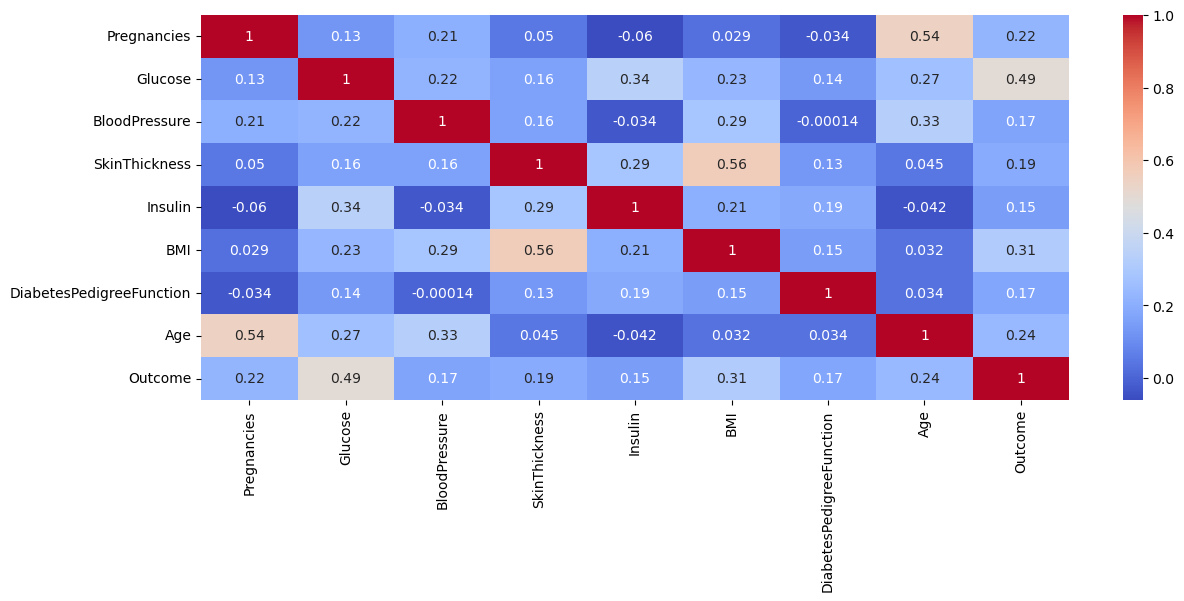

In [45]:
plt.figure(figsize=(14, 5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

**Observations:**
- Moderately positive correlation is found b/w **'Age'** and **'Pregnancies'**, **'BMI'** and **'SkinThickness'**.

## Splitting the dataset into Train and Test data:

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1234, stratify=y)

In [48]:
x_train.shape

(576, 8)

In [49]:
y_train.shape

(576, 1)

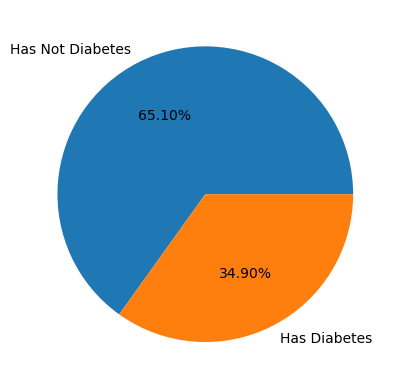

In [50]:
plt.pie(y_train.value_counts(), autopct="%.2f%%", labels=['Has Not Diabetes', 'Has Diabetes'])
plt.show()

In [51]:
x_test.shape

(192, 8)

In [52]:
x_test.shape

(192, 8)

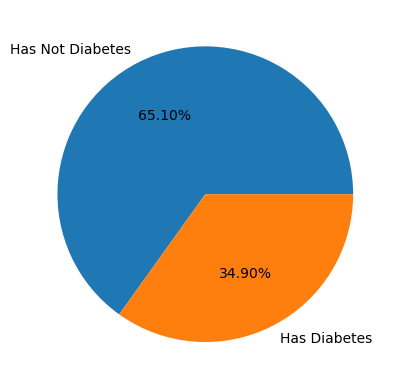

In [53]:
plt.pie(y_test.value_counts(), autopct="%.2f%%", labels=['Has Not Diabetes', 'Has Diabetes'])
plt.show()

## Building the Logistic Regression model:

**Logistic Regression** supervised learning algorithm that is used to solve classification problems. In the context of Binary 
Classification the probability score(z) is calculated on for every datapoint and if the calculated probability of the datapoint 
belonging to +ve class based on this probability score(z) exceeds the threshold then the datapoint is given the label of +ve 
class else the label of -ve class is given.

**Logistic Regression** assumes that the z(probability score) is a linear combination of the features pertinent to the classification of the datapoint.

**z(probability score) = w_0 + w_1 * x1 + w_2 * x2 + ... w_m * xm**

w_1, ..., w_m are the weights corresponding to the features x1, x2, ..., xm which can be thought of as the contribution of each
of these feature to the probability score(z) and hence to p(probability of the datapoint belonging to +ve class).

w_0 is a constant known as bias.

**p(probability of the datapoint belonging to +ve class) = sigmoid(z)**

**sigmoid(z) = 1/(1+exp(-z))**

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lor_model = LogisticRegression()
lor_model.fit(x, y)

LogisticRegression()

In [56]:
lor_model.coef_

array([[ 1.78157601e-01,  3.55914314e-02, -2.94119712e-02,
        -6.83905631e-04, -2.51366322e-03,  8.53332351e-02,
         2.14129710e+00, -2.46308986e-03]])

In [57]:
lor_model.intercept_

array([-7.13143045])

## Testing the Model:

In [58]:
y_pred_train_1_lor = pd.DataFrame(lor_model.predict(x_train), columns=y_train.columns, index=y_train.index)
y_pred_test_1_lor = pd.DataFrame(lor_model.predict(x_test), columns=y_test.columns, index=y_test.index)

In [59]:
y_pred_train_1_lor

,Outcome
92,0
155,1
276,0
16,0
672,0
...,...
298,1
223,1
36,1
457,0


In [60]:
y_train

,Outcome
92,0
155,1
276,1
16,1
672,0
...,...
298,1
223,0
36,0
457,0


In [61]:
y_pred_test_1_lor

,Outcome
190,0
533,0
760,0
318,0
528,0
...,...
334,0
57,0
320,0
374,1


In [62]:
y_test

,Outcome
190,0
533,0
760,0
318,0
528,0
...,...
334,0
57,0
320,0
374,0


## Calculating performance metrics for the Logistic Regression based model:

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [64]:
accuracy_score(y_train, y_pred_train_1_lor)

0.7673611111111112

In [65]:
accuracy_score(y_test, y_pred_test_1_lor)

0.796875

In [66]:
print(classification_report(y_train, y_pred_train_1_lor))
print("*"*80)
print(classification_report(y_test, y_pred_test_1_lor))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       375
           1       0.71      0.56      0.63       201

    accuracy                           0.77       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.76      0.77      0.76       576

********************************************************************************
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       125
           1       0.77      0.60      0.67        67

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



In [67]:
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format

def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.3g', xticklabels=['Not Diabetes', 'Diabetes'], 
            yticklabels=['Not Diabetes', 'Diabetes'], cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {c_matrix_for}')
    plt.show()

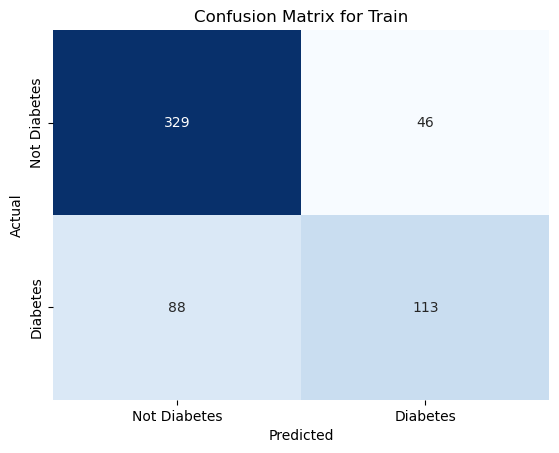

In [68]:
draw_confusion_matrix(y_train, y_pred_train_1_lor, c_matrix_for='Train')

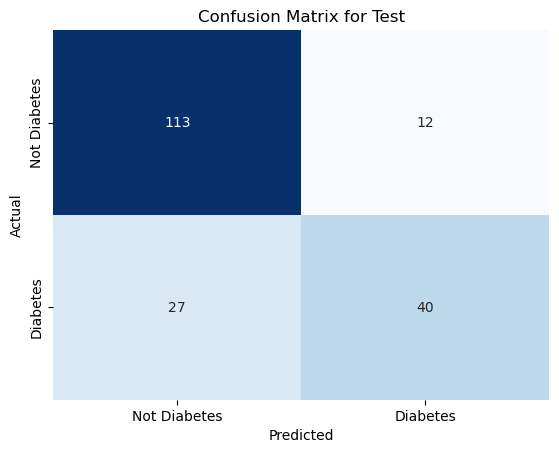

In [69]:
draw_confusion_matrix(y_test, y_pred_test_1_lor, c_matrix_for='Test')

## Performing stratified k-fold cross validation to obtain a better estimate of our Logistic Regression based model's accuracy:

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
accuracy_logistic = cross_val_score(lor_model, x_train, y_train, cv=10)
accuracy_logistic

array([0.84482759, 0.79310345, 0.81034483, 0.77586207, 0.79310345,
       0.75862069, 0.78947368, 0.66666667, 0.75438596, 0.61403509])

In [72]:
accuracy_logistic.mean()

0.7600423472474289

## Plotting the ROC Curve:

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [74]:
y_prob_test = lor_model.predict_proba(x_test)[:, 1]
print(y_prob_test)

[0.08460385 0.18326843 0.19822039 0.21076938 0.14523695 0.5543352
 0.45036398 0.38675178 0.24972019 0.1092424  0.19670883 0.56150689
 0.16448385 0.62076604 0.32973629 0.49887517 0.13603727 0.03758075
 0.25210067 0.5942894  0.23824443 0.04874095 0.72075557 0.27138946
 0.43173559 0.26109173 0.19962892 0.47791887 0.86230266 0.27483176
 0.60120238 0.5756783  0.11802043 0.94775266 0.85608645 0.26330387
 0.33172981 0.29127683 0.33592182 0.04779801 0.40722659 0.94651552
 0.11248939 0.30152048 0.45373995 0.47177563 0.68124673 0.38797364
 0.16574108 0.34260971 0.06199854 0.1440883  0.28274036 0.2811527
 0.29809282 0.04796934 0.03691236 0.93170123 0.80859623 0.51769113
 0.24351309 0.29108084 0.16505438 0.06812851 0.6300726  0.63478284
 0.37875455 0.80020465 0.41584757 0.11009478 0.12789537 0.08094023
 0.18922476 0.17727284 0.19525947 0.25944953 0.76426377 0.14212493
 0.44050054 0.68807042 0.69560097 0.34193512 0.03643521 0.24852027
 0.10001867 0.73164031 0.64577484 0.04167675 0.48555458 0.168906

In [75]:
# Calculating the ROC curve using the test data:

# By default pos_label keyword argument value for roc_curve is 1.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

In [76]:
len(thresholds)

64

In [77]:
'''
    roc_auc_score(y_true, y_score) method is used to compute the area under the ROC AUC.
'''
roc_auc = roc_auc_score(y_test, y_prob_test)
roc_auc

0.8327164179104478

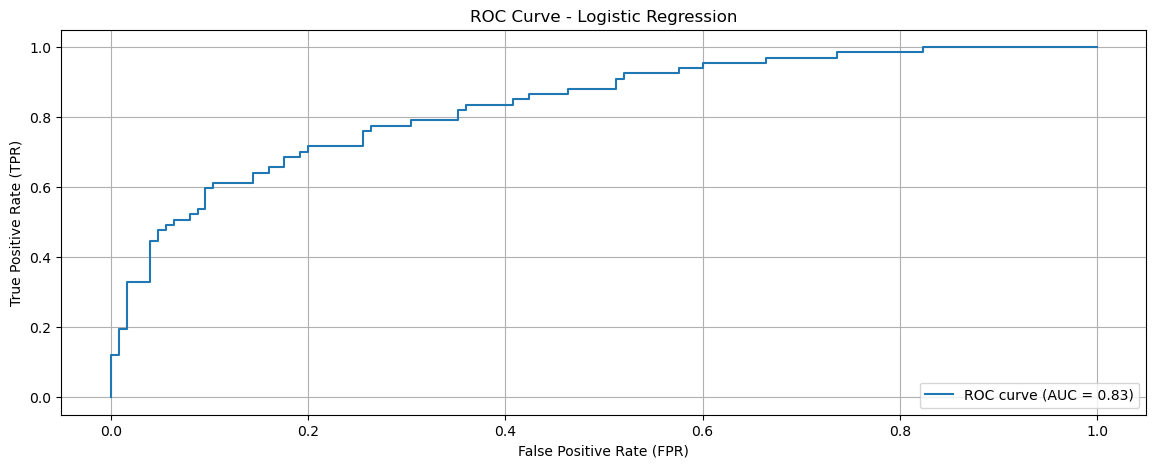

In [78]:
plt.figure(figsize=(14, 5))

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')

plt.grid()
plt.show()

In [79]:
'''
    Converting the ROC curve information into a dataframe df_roc.
'''
df_roc = pd.DataFrame(data={'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
df_roc

,fpr,tpr,thresholds
0,0.000,0.000000,1.969839
1,0.000,0.014925,0.969839
2,0.000,0.119403,0.885600
3,0.008,0.119403,0.862303
4,0.008,0.194030,0.841936
...,...,...,...
59,0.736,0.970149,0.110095
60,0.736,0.985075,0.109242
61,0.824,0.985075,0.084604
62,0.824,1.000000,0.081497


In [80]:
'''
    Based on the above ROC curve we choose the range of FPR where the TPR is around 0.80 and this comes as 0.34 - 0.39, now
    from the df_roc we get the thresholds values corresponding to this range of FPR.
    
    We choose threshold corresponding to highest TPR which is 0.281 approximately.
    
'''
df_roc[((df_roc['fpr'] >= 0.34) & (df_roc['fpr'] <= 0.39))]

,fpr,tpr,thresholds
39,0.352,0.791045,0.291081
40,0.352,0.820896,0.281666
41,0.360,0.820896,0.281153
42,0.360,0.835821,0.280717


In [81]:
# Making predictions based on the newly chosen threshold for the positive class.

y_pred_test_new_threshold  = np.where(y_prob_test > 0.36, 1, 0)
y_pred_test_new_threshold

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

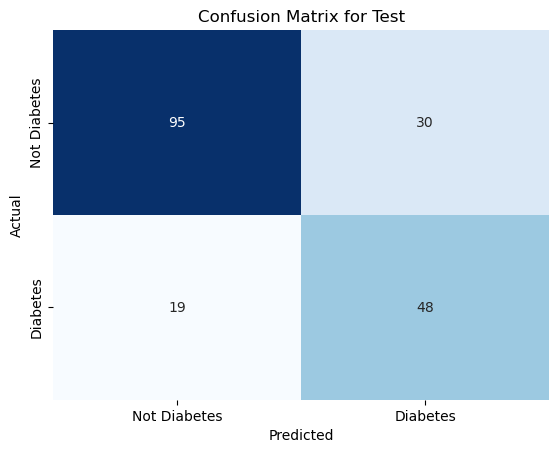

In [82]:
draw_confusion_matrix(y_test, y_pred_test_new_threshold, c_matrix_for='Test')

In [83]:
'''
     Our recall which is the TPR has gone up from 0.60 to 0.72 which means that the proportion of Diabetes people 
     correctly classifed has been improved for the test data.
'''
print(classification_report(y_test, y_pred_test_new_threshold))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       125
           1       0.62      0.72      0.66        67

    accuracy                           0.74       192
   macro avg       0.72      0.74      0.73       192
weighted avg       0.76      0.74      0.75       192



In [84]:
y_prob_train = lor_model.predict_proba(x_train)[:, 1]

In [85]:
y_pred_train_new_threshold  = np.where(y_prob_train > 0.36, 1, 0)

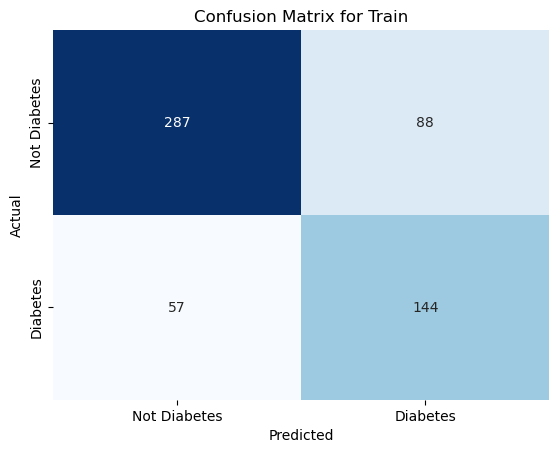

In [86]:
draw_confusion_matrix(y_train, y_pred_train_new_threshold, c_matrix_for='Train')

In [87]:
print(classification_report(y_train, y_pred_train_new_threshold))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       375
           1       0.62      0.72      0.67       201

    accuracy                           0.75       576
   macro avg       0.73      0.74      0.73       576
weighted avg       0.76      0.75      0.75       576



In [88]:
lor_model.coef_

array([[ 1.78157601e-01,  3.55914314e-02, -2.94119712e-02,
        -6.83905631e-04, -2.51366322e-03,  8.53332351e-02,
         2.14129710e+00, -2.46308986e-03]])

In [89]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [90]:
df_feature_importance = pd.DataFrame({'Features': x_train.columns.tolist(),'Weights': lor_model.coef_[0]})
df_feature_importance

,Features,Weights
0,Pregnancies,0.178158
1,Glucose,0.035591
2,BloodPressure,-0.029412
3,SkinThickness,-0.000684
4,Insulin,-0.002514
5,BMI,0.085333
6,DiabetesPedigreeFunction,2.141297
7,Age,-0.002463


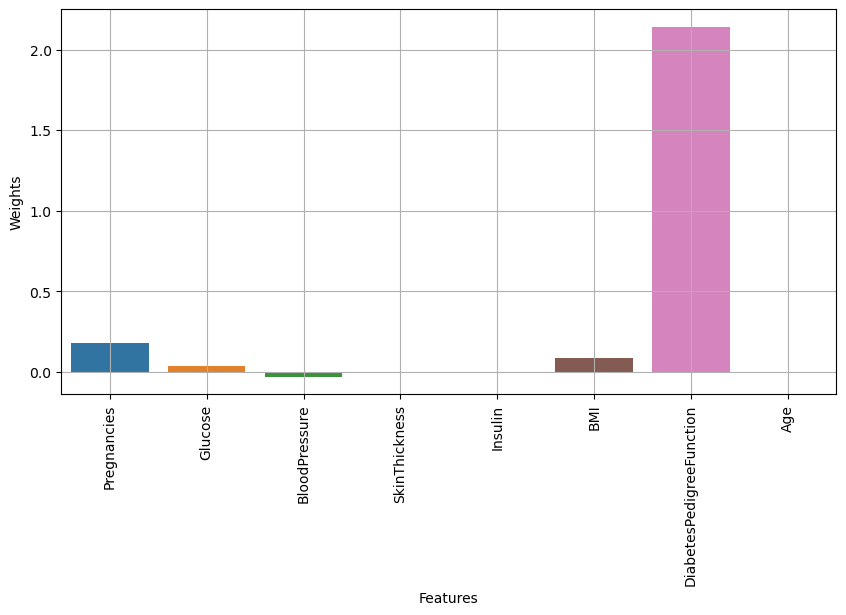

In [91]:
plt.figure(figsize = (10, 5))

plt.xticks(rotation=90)
sns.barplot(x='Features', y='Weights', data=df_feature_importance, )

plt.grid()

**Conclusion:**

For the Logistic Regression based model:

**When threshold value for a datapoint belongs to Diabetes class is 0.5**:
- **Train accuracy is: 76%**
- **Test accuracy is: 80%**

- **Recall for Non-Diabetes class on train is: 88%**
- **Recall for Non-Diabetes class on test is: 90%**

- **Recall for Diabetes class on train is: 56%**
- **Recall for Diabetes class on test is: 60%**

- **We see the discriminatory power of the model in correctly classifying the Non-Diabetes class is very good but it does
not do well in correctly classifying the Diabetes class.**

**When threshold value for a datapoint belongs to Diabetes class is 0.36**:

**This threshold value has been found as 0.36 using the ROC AUC so as to improve the False Negative Rate / Recall for Diabetes class.**

- **Train accuracy is: 75%**
- **Test accuracy is: 74%**

- **Recall for Non-Diabetes class on train is: 77%**
- **Recall for Non-Diabetes class on test is: 76%**

- **Recall for Diabetes class on train is: 72%**
- **Recall for Diabetes class on test is: 72%**

- **We see that after changing the threshold value the discriminatory power of the model in correctly classifying the Diabetes and Non-Diabetes class is fairly good.**

**Important Features as per the Weights found by the Logistic Regression model are:**
- **DiabetesPedigreeFunction**
- **Pregnancies**
- **BMI**
- **Glucose**
- **BloodPressure**

## Building the KNN based model:

**KNN(K Nearest Neighbours)** is a supervised learning algorithm that is used for classification problems especially in medical 
domain. KNN is a discriminative model which means it does not learn any useful information/patterns from the train dataset.
It relies on majority label of the k-nearest datapoints to predict the label for any test datapoint.

The hyperparameter in **KNN** is the value of **k** itself which is the number of nearest neighbours to consider for predicting label of any test datapoint. The value for **k** is found by **Error(Number of Misclassifications) vs k plot** and choosing an odd number for **k** which has minimum Error.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
error_test = []
error_train = []

'''
    Trying 100 different values of k(hyperparamter in KNN).
'''
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(x_train, y_train)
    
    y_pred_test_knn_1 = pd.DataFrame(knn.predict(x_test), columns=y_test.columns, index=y_test.index)
    y_pred_train_knn_1 = pd.DataFrame(knn.predict(x_train), columns=y_train.columns, index=y_train.index)
    
    error_test.append((y_pred_test_knn_1 != y_test).sum()[0])
    error_train.append((y_pred_train_knn_1 != y_train).sum()[0])

In [94]:
print('Error in Test data')
print(error_test)

print('Error in Train data')
print(error_train)

Error in Test data
[65, 56, 58, 50, 50, 49, 46, 44, 45, 49, 47, 45, 47, 45, 47, 46, 46, 47, 44, 46, 43, 45, 45, 46, 44, 45, 43, 42, 43, 46, 44, 44, 44, 43, 42, 42, 43, 41, 40, 41, 40, 42, 43, 43, 39, 39, 42, 43, 43, 42, 43, 41, 46, 43, 44, 41, 42, 39, 42, 41, 43, 41, 44, 38, 39, 38, 39, 38, 42, 39, 42, 41, 42, 39, 38, 37, 39, 37, 38, 37, 39, 38, 39, 38, 38, 38, 40, 40, 42, 42, 44, 45, 45, 48, 47, 47, 49, 50, 50]
Error in Train data
[0, 80, 92, 114, 111, 109, 114, 119, 126, 120, 130, 124, 126, 123, 128, 133, 133, 131, 138, 136, 134, 141, 136, 140, 136, 137, 137, 142, 136, 143, 135, 140, 139, 139, 143, 142, 142, 143, 138, 140, 140, 141, 142, 141, 146, 149, 145, 149, 147, 150, 148, 150, 149, 146, 147, 150, 149, 154, 152, 149, 147, 148, 150, 154, 153, 151, 153, 151, 151, 153, 154, 155, 152, 153, 152, 153, 151, 154, 152, 150, 151, 152, 154, 151, 151, 155, 155, 154, 152, 154, 152, 155, 158, 156, 159, 159, 157, 157, 158]


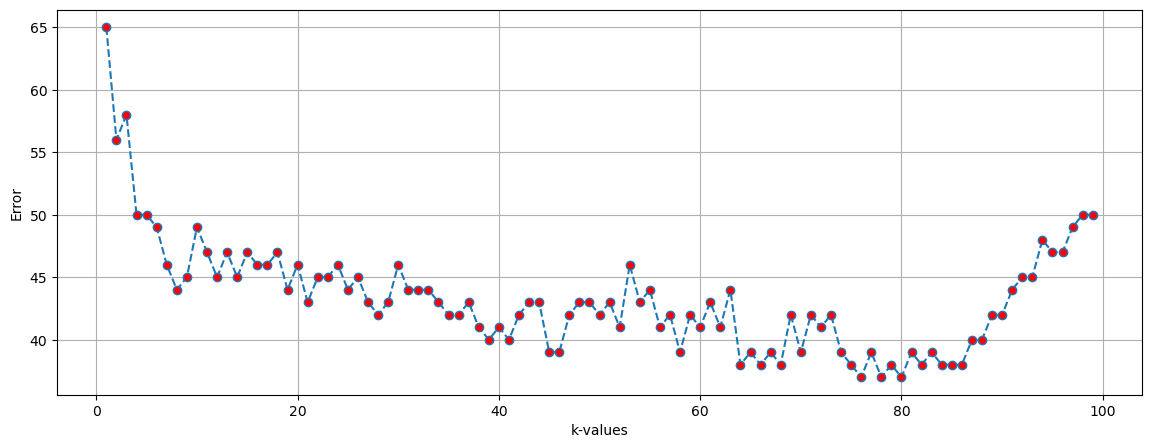

In [95]:
'''
    From the Error vs k-values plot we can see than the odd value of k when the number of Error is minimum is 65.
'''
x_values = range(1, 100)
plt.figure(figsize=(14,5))
plt.plot(x_values, error_test, marker='o', linestyle='dashed', markerfacecolor='r')
plt.xlabel('k-values')
plt.ylabel('Error')
plt.grid()

In [96]:
# From the Error vs k-values plot we get k = 65 for which Error is minimum.

knn_model = KNeighborsClassifier(n_neighbors=65, weights='uniform')
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=65)

In [97]:
y_pred_test_knn_2 = pd.DataFrame(knn_model.predict(x_test), columns=y_test.columns, index=y_test.index)
y_pred_train_knn_2 = pd.DataFrame(knn_model.predict(x_train), columns=y_train.columns, index=y_train.index)

In [98]:
(y_pred_test_knn_2 != y_test).sum()[0]

39

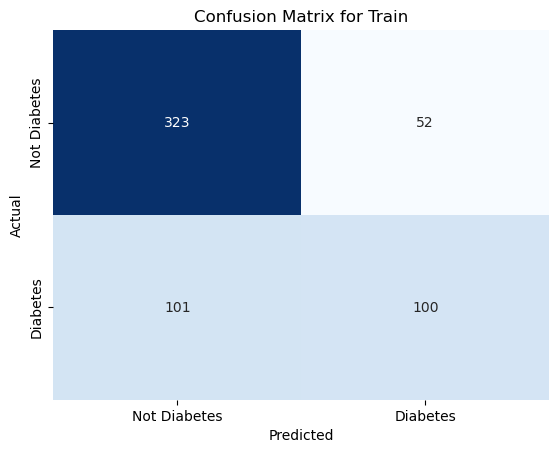

In [99]:
draw_confusion_matrix(y_train, y_pred_train_knn_2, c_matrix_for='Train')

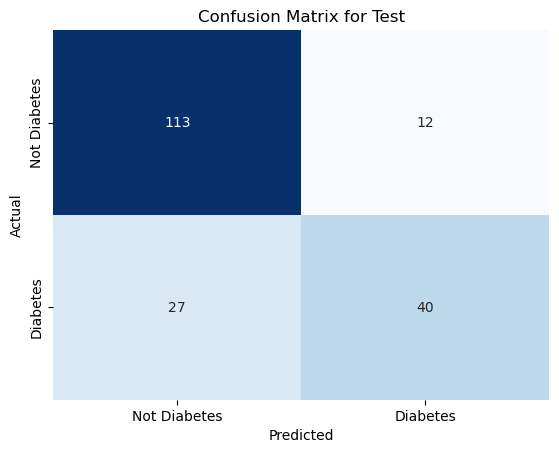

In [100]:
draw_confusion_matrix(y_test, y_pred_test_knn_2, c_matrix_for='Test')

In [101]:
print('Classification report for Train dataset:')
print(classification_report(y_train, y_pred_train_knn_2))
print("*"*40)
print('Classification report for Test dataset:')
print(classification_report(y_test, y_pred_test_knn_2))

Classification report for Train dataset:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       375
           1       0.66      0.50      0.57       201

    accuracy                           0.73       576
   macro avg       0.71      0.68      0.69       576
weighted avg       0.73      0.73      0.72       576

****************************************
Classification report for Test dataset:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       125
           1       0.77      0.60      0.67        67

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



In [105]:
## Getting the number of false negatives.

fp = y_pred_test_knn_2[((y_pred_test_knn_2 == 0) & (y_pred_test_knn_2 != y_test))['Outcome']]
fp_num = len(fp)
fp_num

27

In [106]:
## Getting the number of true posotives.

tp = y_pred_test_knn_1[((y_pred_test_knn_2 == 1) & (y_pred_test_knn_2 == y_test))['Outcome']]
tp_num = len(tp)
tp_num

40

In [107]:
fp_num/(fp_num + tp_num)

0.40298507462686567

## Performing stratified k-fold cross validation to obtain a better estimate of our KNN based model's accuracy:

In [108]:
accuracy_knn = cross_val_score(knn_model, x_train, y_train, cv=10)
accuracy_knn

array([0.79310345, 0.75862069, 0.74137931, 0.74137931, 0.72413793,
       0.74137931, 0.77192982, 0.63157895, 0.70175439, 0.59649123])

In [109]:
accuracy_knn.mean()

0.7201754385964911

**Conclusion:**

For the KNN based model:
- **Train accuracy is: 72%**
- **Test accuracy is: 80%**

- **On test data recall for Diabetes class is 0.60 and for Non-Diabetes class is 0.90 which indicates that the model does very well in 
correctly classifying females who do not have diabetes but does not do well in correctly classifying females who do have diabetes because the FNR(False Negative Rate) is 40.3% which is high.**